In [1]:
import numpy as np
import pandas as pd
import sqlite3
import os
import matplotlib.pylab as plt
%matplotlib inline
import glob

In [4]:
v14_path = '/Users/yoachim/runs1.4/'
files = glob.glob('/Users/yoachim/runs/wfd_depth/*.db')[1:]


dirs = [file[:-3] for file in files]
snaps = [1]*len(files)
# snaps[0] = 2
pairs = ['mixed']*len(files)
# pairs[1] = 'same'

#dirs.append('/Users/yoachim/Temp/old_runs/baseline2018a_note')
#snaps.append(2)
#pairs.append('same')

In [5]:
files

['/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.90_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.80_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.70_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.99_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.85_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.75_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.65_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.95_v1.4_10yrs.db']

In [6]:
results = {'fONv MedianNvis':[], 'fOArea': [], 'osf':[], 'nexp':[], 'fONv MinNvis':[]}
for directory in dirs:
    conn = sqlite3.connect(os.path.join(directory, 'resultsDb_sqlite.db'))
    df = pd.read_sql('select summaryValue from summarystats where summaryName="fONv MedianNvis";', conn)
    results['fONv MedianNvis'].append(np.max(df.values))
    
    df = pd.read_sql('select summaryValue from summarystats where summaryName="fOArea";', conn)
    results['fOArea'].append(np.max(df.values))
    
    df = pd.read_sql('select summaryValue from summarystats where metricid=3;', conn)
    results['osf'].append(np.max(df.values))
    
    df = pd.read_sql('select summaryValue from summarystats where metricid=5;', conn)
    results['nexp'].append(np.max(df.values))
    
    df = pd.read_sql('select summaryValue from summarystats where summaryName="fONv MinNvis";', conn)
    results['fONv MinNvis'].append(np.max(df.values))
    
    conn.close()

In [7]:
keys = list(results.keys())
header = '| Run Name  |    '
for key in keys:
    header+= '%s |' % key

header += 'snaps |'
header += 'pairs |'
print(header)
print('| -- | -- | -- | -- | --| --| --|--|')
for i in range(len(dirs)):
    rn = os.path.basename(dirs[i])
    out = '| '
    out += rn +' |'
    for key in keys:
        out +='   %.3f  |' % results[key][i]
    out += '  %i |' % snaps[i]
    out += '  %s |' % pairs[i]
    print(out)
    

| Run Name  |    fONv MedianNvis |fOArea |osf |nexp |fONv MinNvis |snaps |pairs |
| -- | -- | -- | -- | --| --| --|--|
| wfd_depth_scale0.90_v1.4_10yrs |   901.000  |   18096.010  |   0.759  |   2180985.000  |   835.000  |  1 |  mixed |
| wfd_depth_scale0.80_v1.4_10yrs |   834.000  |   11407.679  |   0.760  |   2182894.000  |   770.000  |  1 |  mixed |
| wfd_depth_scale0.70_v1.4_10yrs |   769.000  |   550.577  |   0.760  |   2183589.000  |   732.000  |  1 |  mixed |
| wfd_depth_scale0.99_v1.4_10yrs |   971.000  |   18195.886  |   0.760  |   2183640.000  |   900.000  |  1 |  mixed |
| wfd_depth_scale0.85_v1.4_10yrs |   869.000  |   17053.608  |   0.759  |   2182196.000  |   803.000  |  1 |  mixed |
| wfd_depth_scale0.75_v1.4_10yrs |   799.000  |   3323.603  |   0.760  |   2183072.000  |   743.000  |  1 |  mixed |
| wfd_depth_scale0.65_v1.4_10yrs |   751.000  |   1859.035  |   0.760  |   2184994.000  |   714.000  |  1 |  mixed |
| wfd_depth_scale0.95_v1.4_10yrs |   940.000  |   18167.350

| Run Name  |    fONv MedianNvis |fOArea |osf |nexp |fONv MinNvis |snaps |pairs |
| -- | -- | -- | -- | --| --| --|--|
| baseline_2snap_v1.3_10yrs |   829.000  |   10232.668  |   0.703  |   2019468.000  |   767.000  |  2 |  mixed |
| baseline_v1.3_10yrs |   929.000  |   18155.600  |   0.760  |   2183599.000  |   862.000  |  1 |  same |
| wfd_95_v1.3_10yrs |   1039.000  |   18391.442  |   0.762  |   2188929.000  |   969.000  |  1 |  mixed |
| wfd_90_v1.3_10yrs |   1002.000  |   18297.441  |   0.762  |   2190125.000  |   932.000  |  1 |  mixed |
| wfd_85_v1.3_10yrs |   963.000  |   18240.369  |   0.762  |   2190583.000  |   895.000  |  1 |  mixed |
| wfd_80_v1.3_10yrs |   922.000  |   18202.601  |   0.762  |   2191506.000  |   857.000  |  1 |  mixed |
| wfd_75_v1.3_10yrs |   884.000  |   18107.760  |   0.763  |   2192342.000  |   829.000  |  1 |  mixed |
| wfd_70_v1.3_10yrs |   851.000  |   15951.615  |   0.764  |   2194175.000  |   814.000  |  1 |  mixed |
| wfd_65_v1.3_10yrs |   830.000  |   10439.134  |   0.763  |   2193981.000  |   794.000  |  1 |  mixed |
| delayedrolling_mod2_sdf_0.10_v1.3_10yrs |   879.000  |   16095.134  |   0.763  |   2191312.000  |   787.000  |  1 |  mixed |
| wfd_only_2snap_v1.3_10yrs |   1034.000  |   18330.173  |   0.707  |   2030265.000  |   965.000  |  2 |  mixed |
| wfd_only_nomix_v1.3_10yrs |   1148.000  |   18513.979  |   0.784  |   2251985.000  |   1069.000  |  1 |  same |
| wfd_only_v1.3_10yrs |   1118.000  |   18505.586  |   0.764  |   2195413.000  |   1044.000  |  1 |  mixed |
| baseline_1exp_pairsame_10yrs |   986.000  |   18226.940  |   0.785  |   2263993.000  |   914.000  |  1 |  same |
| baseline_1exp_pairsmix_10yrs |   963.000  |   18186.654  |   0.768  |   2216026.000  |   895.000  |  1 |  mixed |
| baseline_2exp_pairsame_10yrs |   907.000  |   18096.850  |   0.725  |   2092909.000  |   839.000  |  2 |  same |
| baseline_2exp_pairsmix_10yrs |   887.000  |   17942.420  |   0.710  |   2048865.000  |   821.000  |  2 |  mixed |



In [8]:
# OK, let's package this shit up as a giant dataframe
array_list = []

names = keys.copy()
names.extend(['Run Name', 'snaps', 'pairs'])
types = [float]*len(keys)
types.extend(['|U40', int, '|U10'])

dt = list(zip(names, types))

for i in range(len(dirs)):
    arr = np.zeros(1, dtype=dt)
    arr['Run Name'] = os.path.basename(dirs[i])
    arr['snaps'] = snaps[i]
    arr['pairs'] = pairs[i]
    for key in keys:
        arr[key] =results[key][i]
    array_list.append(arr) 


In [9]:
data_array = np.concatenate(array_list)
data_array

array([ ( 901.,  18096.0102844 ,  0.75891528,  2180985.,  835., 'wfd_depth_scale0.90_v1.4_10yrs', 1, 'mixed'),
       ( 834.,  11407.67922571,  0.75953189,  2182894.,  770., 'wfd_depth_scale0.80_v1.4_10yrs', 1, 'mixed'),
       ( 769.,    550.57663126,  0.75985664,  2183589.,  732., 'wfd_depth_scale0.70_v1.4_10yrs', 1, 'mixed'),
       ( 971.,  18195.88622818,  0.7598429 ,  2183640.,  900., 'wfd_depth_scale0.99_v1.4_10yrs', 1, 'mixed'),
       ( 869.,  17053.60757705,  0.75933665,  2182196.,  803., 'wfd_depth_scale0.85_v1.4_10yrs', 1, 'mixed'),
       ( 799.,   3323.60283504,  0.75964411,  2183072.,  743., 'wfd_depth_scale0.75_v1.4_10yrs', 1, 'mixed'),
       ( 751.,   1859.03542414,  0.76029533,  2184994.,  714., 'wfd_depth_scale0.65_v1.4_10yrs', 1, 'mixed'),
       ( 940.,  18167.35024424,  0.75913614,  2181446.,  870., 'wfd_depth_scale0.95_v1.4_10yrs', 1, 'mixed')],
      dtype=[('fONv MedianNvis', '<f8'), ('fOArea', '<f8'), ('osf', '<f8'), ('nexp', '<f8'), ('fONv MinNvis', '<f8'), 

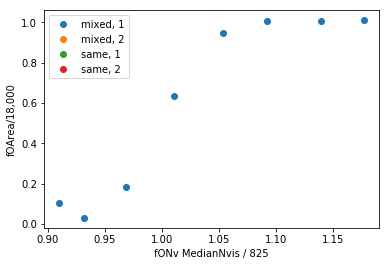

In [10]:
filters = ['mixed', 'same']
snaps = [1,2]

for filt in filters:
    for snap in snaps:
        good = np.where((data_array['snaps'] == snap) & (data_array['pairs'] == filt) )
        plt.plot(data_array['fONv MedianNvis'][good]/825., data_array['fOArea'][good]/18000, 'o', label=filt+', %i' % snap)
plt.xlabel('fONv MedianNvis / 825')
plt.ylabel('fOArea/18,000')
plt.legend()

In [11]:
df = pd.DataFrame(data_array)
df['nexp'] = np.round(df['nexp']/1e6*100)/100
df['fONv MedianNvis'] = np.round(df['fONv MedianNvis']/825*100)/100
df['fOArea'] = np.round(df['fOArea']/18000*100)/100
df['fONv MinNvis'] = np.round(df['fONv MinNvis']/825*100)/100


In [12]:
latex_table = df.to_latex(index=False, #float_format="%%.1f",
                          columns=['Run Name', 'fONv MedianNvis', 'fONv MinNvis', 'fOArea', 'nexp', 'snaps', 'pairs'])
print(latex_table)

\begin{tabular}{lrrrrrl}
\toprule
                       Run Name &  fONv MedianNvis &  fONv MinNvis &  fOArea &  nexp &  snaps &  pairs \\
\midrule
 wfd\_depth\_scale0.90\_v1.4\_10yrs &             1.09 &          1.01 &    1.01 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.80\_v1.4\_10yrs &             1.01 &          0.93 &    0.63 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.70\_v1.4\_10yrs &             0.93 &          0.89 &    0.03 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.99\_v1.4\_10yrs &             1.18 &          1.09 &    1.01 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.85\_v1.4\_10yrs &             1.05 &          0.97 &    0.95 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.75\_v1.4\_10yrs &             0.97 &          0.90 &    0.18 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.65\_v1.4\_10yrs &             0.91 &          0.87 &    0.10 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.95\_v1.4\_10yrs &             1.14 &          1.05 &    1.01 

In [13]:
#names2fracs = ['wfd_95_v1.3_10yrs', 'wfd_90_v1.3_10yrs','wfd_85_v1.3_10yrs','wfd_80_v1.3_10yrs', 'wfd_75_v1.3_10yrs',
#              'wfd_70_v1.3_10yrs','wfd_65_v1.3_10yrs']
#fracs = [float(name.split('_')[1]) for name in names2fracs]

fracs = [float(file.split('/')[-1].split('_scale')[-1].split('_')[0]) for file in files]
indices = [np.max(np.where(df['Run Name'].values == name.split('/')[-1][:-3])[0]) for name in files]



In [14]:
files[0].split('/')[-1], df['Run Name'].values

('wfd_depth_scale0.90_v1.4_10yrs.db',
 array(['wfd_depth_scale0.90_v1.4_10yrs', 'wfd_depth_scale0.80_v1.4_10yrs',
        'wfd_depth_scale0.70_v1.4_10yrs', 'wfd_depth_scale0.99_v1.4_10yrs',
        'wfd_depth_scale0.85_v1.4_10yrs', 'wfd_depth_scale0.75_v1.4_10yrs',
        'wfd_depth_scale0.65_v1.4_10yrs', 'wfd_depth_scale0.95_v1.4_10yrs'], dtype=object))

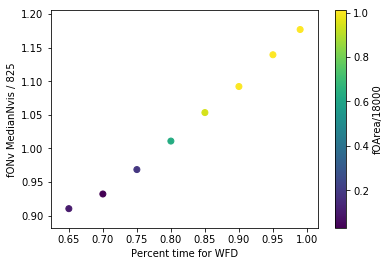

In [15]:
plt.scatter(fracs, data_array['fONv MedianNvis'][indices]/825., c= data_array['fOArea'][indices]/18000)
cb = plt.colorbar()
cb.set_label('fOArea/18000')
plt.xlabel('Percent time for WFD')
plt.ylabel('fONv MedianNvis / 825')


I suspect the slight uptick when going to WDF at 100% is that more area is gets totally masked, so there might be slightly less dithering loss? 5% seems like a pretty big bonus though. Maby a quirk in the stats, where we're chopping off a long tail, so the median can jump up a bit? Or we assigned 95% of time to WFD, but it ended up only giving 90% because of other basis functions. WFD only also gets a very slightly higher open shutter fraction. 

I think this makes sense on both ends a bit. If we only do WFD, then we get between 1.31 and 1.36 for fONv Median. If we cut and somewhere between 70 and 75% WFD, we drop below fOArea of 1.0.  

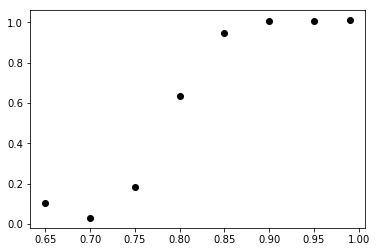

In [16]:
plt.plot(fracs, data_array['fOArea'][indices]/18000, 'ko')
